<h1 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 5px 5px;"><strong><centre>Motion Activity Classification Using Recurrent Neural Networks </centre></strong></h1>

<h2 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 5px 5px;"><strong><centre>Methodology: Model Architecture </centre></strong></h2>

#### 03.Model Development
**Objective:** Train a Tradicional RNN model on the preprocessed dataset.

**Model Training:** <br>
<br>
 - **Base Model:**
    + Defines the CNN architecture using Keras layers such as Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.
    + Compiles the model with the Adam optimizer and categorical cross-entropy loss.
 
 - **Training and Evaluation:**
    + Utilizes EarlyStopping and ModelCheckpoint callbacks for efficient training.
    + Trains the model and evaluates its performance on the validation set.
    + Includes code to visualize training and validation accuracy over epochs.

---

Time Windowing: 
+ Segment the time series data into fixed-size windows (e.g., 1 second, 5 seconds).
+ Experiment with different window sizes to see their impact on model performance.

1. Model Architecture Design

+ Design RNN-based models using different types of layers:
    * Traditional RNN layers
    * Long Short-Term Memory (LSTM) layers
+ Define multiple architectures, e.g., a simple RNN, a single-layer LSTM, and a multi-layer LSTM.

2. Model Implementation

+ Implement the models using a deep learning framework such as TensorFlow or PyTorch.
+ Compile the models with appropriate loss functions and optimizers (e.g., categorical cross-entropy, Adam).

3. Model Training

+ Train the models on the training set with different configurations of RNN layers and time windows.
+ Use validation data to tune hyperparameters and avoid overfitting.
+ Save the model weights and training logs for analysis.

## **Carregamento das Bibliotecas Base**

In [28]:
import os 
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical


import warnings
warnings.filterwarnings('ignore')

## **Carregamento e Leitura do *Dataset* Pré-processado**

In [29]:
# Definir o caminho do arquivo relativo ao diretório do script
#file_path = os.path.join(os.getcwd(), 'RNN_dataset', 'concatDataset.csv')

base_dir = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets'
file_name = 'preprocessDataset.csv'

file_path = os.path.join(base_dir, file_name)
print(file_path)

C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets\preprocessDataset.csv


In [42]:
%run RNN/handlingFunctions/evaluation.ipynb')

Exception: File `"RNN\\\\handlingFunctions\\\\evaluation.ipynb')"` not found.

+ Utilização do método `read_csv()` para leitura do arquivo CSV com os dados pré-processados

In [30]:
df_motionSense = pd.read_csv(file_path)

+ Visualização das 5 primeiras linhas do *dataset* utilizando o método `head()`

In [31]:
df_motionSense.head(5)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,category_encoded
0,1.021959,1.107385,0.417181,2.406195,-0.829476,0.358419,0.201954,0.523800,1.149716,0.877204,-0.498997,0.725271,0
1,1.021865,1.153671,0.405934,2.444120,-0.881869,0.356343,0.541955,0.276988,0.671182,0.661825,-0.067095,0.090614,0
2,1.021713,1.181012,0.401818,2.466163,-0.913179,0.354734,-0.092472,-0.047588,0.344296,0.066402,0.126678,-0.592361,0
3,1.014353,1.187365,0.404709,2.469880,-0.920496,0.324710,-0.019243,-0.750886,0.009028,0.011899,0.130769,0.042514,0
4,0.999076,1.189446,0.403053,2.467690,-0.922890,0.262797,0.070893,-0.656115,0.021537,0.604865,0.556535,-0.293948,0


**Splitting Data for Machine Learning**

The following code uses the 'train_test_split' function from scikit-learn to divide the dataset into training and testing sets. It separates the input features ('x_columns') and the target variable ('y_columns') with a 20% test set size, ensuring that the lengths of the training sets for both features and labels are the same, as asserted.

**Sequencing Data for Temporal Analysis**

We define a sequence generator function that creates sequences of input features and corresponding target labels from the training and testing data. These sequences have a window length of 150 with a stride of 10. The mode of target labels within each sequence is calculated to represent the label for that sequence. This prepares the data for temporal analysis tasks.

## **Preparação do *Dataset* para treinar modelos de classificação de atividades baseado em RNN**

+ A função `prepare_data()` realiza o pré-processamento necessário para treinar um modelo de classificação de atividades baseado em RNNs. Este cria sequências de dados a partir da função `create_sequence()` e divide o conjunto de dados em treino e teste.

Esta divisão foi feita com base na função `train_test_split()` do scikit-learn que permite dividir o conjunto de dados em conjuntos de treino e teste. Este separa as *features* ('x_columns') e a *target* ('y_columns') com um tamanho de conjunto de teste de, neste caso, 20% (`test_size=0.2`), garantindo que os comprimentos dos conjuntos de treino para *features* e *targets* sejam os mesmos.

In [32]:
def prepare_data(df, window_length):
    """
    Preprocesses the dataset for training an RNN-based activity classification model.

    Args:
        df (pandas.DataFrame): The input dataset containing features and labels.
        window_length (int): The desired length of the time window for creating sequences.

    Returns:
        X_train, X_test, y_train, y_test: Processed training and testing data.
    """
    def create_sequences(data, target, window_size):
        sequences = []
        targets = []
        for i in range(len(data) - window_size):
            seq = data[i:i+window_size]
            label = target[i+window_size]
            sequences.append(seq)
            targets.append(label)
        return np.array(sequences), np.array(targets)
    
    y = df['category_encoded']
    X = df.drop(columns=['category_encoded'])
    
    X_seq, y_seq = create_sequences(X, y, window_length)
    
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
    
    y_train = to_categorical(y_train, num_classes=y.nunique())
    y_test = to_categorical(y_test, num_classes=y.nunique())
    
    return X_train, X_test, y_train, y_test

+ Definição de variáveis importantes

In [33]:
NUM_FEATURES = df_motionSense.shape[1] - 1
NUM_CLASSES = df_motionSense['category_encoded'].nunique()

## **Definição de métodos de Regularização**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

## **Definição de Arquiteturas**

### **Modelo 1**

In [8]:
WINDOW_LENGTH = 20
    
X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

In [9]:
model_1 = Sequential()
model_1.add(SimpleRNN(50, input_shape=(WINDOW_LENGTH, NUM_FEATURES)))
model_1.add(Dense(NUM_CLASSES, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         3,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,303 (12.90 KB)

 Trainable params: 3,303 (12.90 KB)

 Non-trainable params: 0 (0.00 B)

## **Treino do Modelo com Diferentes `epochs`**

1. Medir o tempo de execução:
+ time.time() é usado para capturar o tempo antes e depois do treinamento.
+ A diferença (end_time - start_time) é calculada para determinar o tempo total de execução.

In [10]:
import time
import pickle

start_time = time.time()

history_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Epoch 1/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8118 - loss: 0.4953 - val_accuracy: 0.9152 - val_loss: 0.2757 - learning_rate: 0.0010
Epoch 2/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9195 - loss: 0.2643 - val_accuracy: 0.9191 - val_loss: 0.2596 - learning_rate: 0.0010
Epoch 3/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9289 - loss: 0.2371 - val_accuracy: 0.9343 - val_loss: 0.2225 - learning_rate: 0.0010
Epoch 4/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9329 - loss: 0.2247 - val_accuracy: 0.9372 - val_loss: 0.2115 - learning_rate: 0.0010
Epoch 5/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9351 - loss: 0.2171 - val_accuracy: 0.9366 - val_loss: 0.2113 - learning_rate: 0.0010
Epoch 6/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9361 - loss: 0.2131 - val_accuracy: 0.9377 - val_loss: 0.2106 - learning_rate: 0.0010
Epoch 7/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms

In [11]:
os.makedirs('models/model_1/h1', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/model_1/h1/history_1.pkl', 'wb') as f:
    pickle.dump(history_1.history, f)

# Guardar o modelo treinado
model_1.save('models/model_1/model_1.h5')

In [12]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/model_1/h1/history_1.pkl'
model_path = 'models/model_1/model_1.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    history_1 = pickle.load(f)

# Carregar o modelo treinado
model_1 = load_model(model_path)

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9610 - loss: 0.1314
Test loss: 0.13361765444278717, Test accuracy: 0.960207462310791


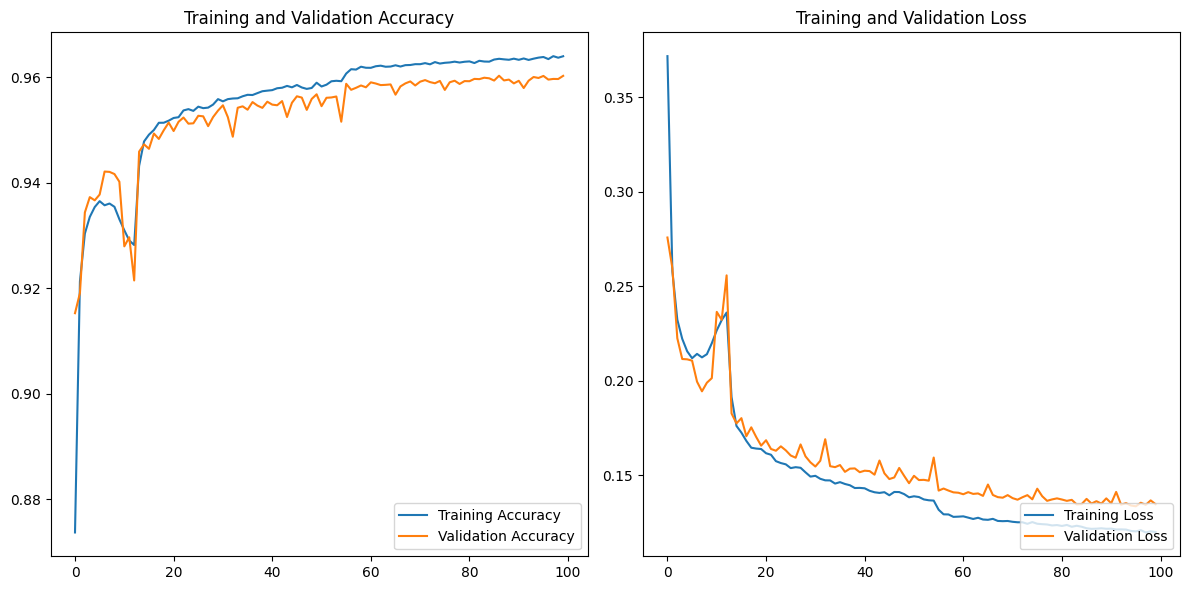

In [15]:
import matplotlib.pyplot as plt

loss, accuracy = model_1.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

acc = history_1["accuracy"]
val_acc = history_1["val_accuracy"]

loss = history_1["loss"]
val_loss = history_1["val_loss"]

EPOCHS = len(acc)

plt.figure(figsize=(12, 6))

# Plotar a acurácia de treinamento e validação
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# Plotar a perda de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")

plt.tight_layout()  # Garante espaçamento adequado entre os subplots
plt.show()

---

In [18]:
WINDOW_LENGTH = 50
    
X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

In [19]:
model_1 = Sequential()
model_1.add(SimpleRNN(50, input_shape=(WINDOW_LENGTH, NUM_FEATURES)))
model_1.add(Dense(NUM_CLASSES, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         3,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,303 (12.90 KB)

 Trainable params: 3,303 (12.90 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
start_time = time.time()

history_2 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Epoch 1/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.7117 - loss: 0.6991 - val_accuracy: 0.7844 - val_loss: 0.5665 - learning_rate: 0.0010
Epoch 2/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - accuracy: 0.7301 - loss: 0.6760 - val_accuracy: 0.6972 - val_loss: 0.7305 - learning_rate: 0.0010
Epoch 3/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - accuracy: 0.7237 - loss: 0.6737 - val_accuracy: 0.7418 - val_loss: 0.6662 - learning_rate: 0.0010
Epoch 4/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.6677 - loss: 0.7827 - val_accuracy: 0.6962 - val_loss: 0.7313 - learning_rate: 0.0010
Epoch 5/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.6500 - loss: 0.8184 - val_accuracy: 0.5390 - val_loss: 0.9631 - learning_rate: 0.0010
Epoch 6/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.5788 - loss: 0.9070 - val_accuracy: 0.6084 - val_loss: 0.8753 - learning_rate: 0.0010
Epoch 7/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms

In [21]:
os.makedirs('models/model_1/h2', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/model_1/h2/history_2.pkl', 'wb') as f:
    pickle.dump(history_2.history, f)

# Guardar o modelo treinado
#model_1.save('models/model_1/model_1.h5')

In [22]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/model_1/h2/history_2.pkl'
model_path = 'models/model_1/model_1.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    history_2 = pickle.load(f)

# Carregar o modelo treinado
model_1 = load_model(model_path)

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9735 - loss: 0.0948
Test loss: 0.09698742628097534, Test accuracy: 0.9732546210289001


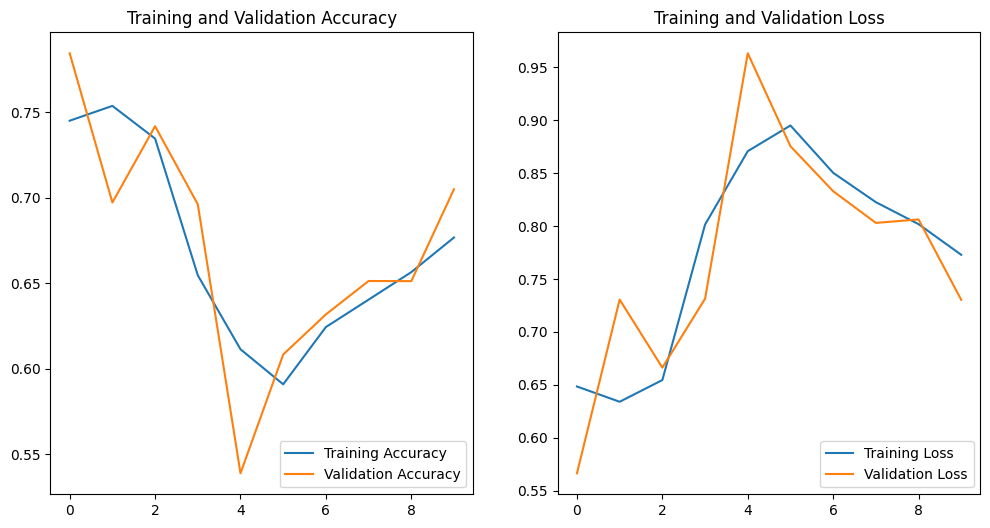

In [23]:
# Evaluate the model2
import matplotlib.pyplot as plt

loss, accuracy = model_1.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history_2["accuracy"]
val_acc = history_2["val_accuracy"]

loss = history_2["loss"]
val_loss = history_2["val_loss"]
 
 
EPOCHS = len(acc)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

---

In [11]:
df_motionSense = pd.read_csv(file_path)

In [12]:
WINDOW_LENGTH = 100

X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

In [32]:
NUM_FEATURES = df_motionSense.shape[1] - 1
NUM_CLASSES = df_motionSense['category_encoded'].nunique()

In [33]:
model_1 = Sequential()
model_1.add(SimpleRNN(50, input_shape=(WINDOW_LENGTH, NUM_FEATURES)))
model_1.add(Dense(NUM_CLASSES, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         3,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,303 (12.90 KB)

 Trainable params: 3,303 (12.90 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
start_time = time.time()

history_3 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Epoch 1/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 102s 6ms/step - accuracy: 0.6146 - loss: 0.8591 - val_accuracy: 0.7084 - val_loss: 0.7100 - learning_rate: 0.0010
Epoch 2/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 99s 6ms/step - accuracy: 0.6465 - loss: 0.7986 - val_accuracy: 0.5715 - val_loss: 0.9131 - learning_rate: 0.0010
Epoch 3/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 96s 6ms/step - accuracy: 0.6094 - loss: 0.8598 - val_accuracy: 0.6174 - val_loss: 0.8357 - learning_rate: 0.0010
Epoch 4/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 102s 6ms/step - accuracy: 0.6305 - loss: 0.8310 - val_accuracy: 0.6119 - val_loss: 0.8738 - learning_rate: 0.0010
Epoch 5/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 91s 6ms/step - accuracy: 0.6206 - loss: 0.8440 - val_accuracy: 0.5654 - val_loss: 0.9271 - learning_rate: 0.0010
Epoch 6/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 104s 7ms/step - accuracy: 0.5940 - loss: 0.8895 - val_accuracy: 0.5773 - val_loss: 0.9102 - learning_rate: 0.0010
Epoch 7/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 87s 

In [35]:
os.makedirs('models/model_1/h3', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/model_1/h3/history_3.pkl', 'wb') as f:
    pickle.dump(history_3.history, f)

# Guardar o modelo treinado
#model_1.save('models/model_1/model_1.h5')

In [1]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/model_1/h3/history_3.pkl'
model_path = 'models/model_1/model_1.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    history_3 = pickle.load(f)

# Carregar o modelo treinado
model_1 = load_model(model_path)

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9720 - loss: 0.1003
Test loss: 0.09841388463973999, Test accuracy: 0.9725656509399414


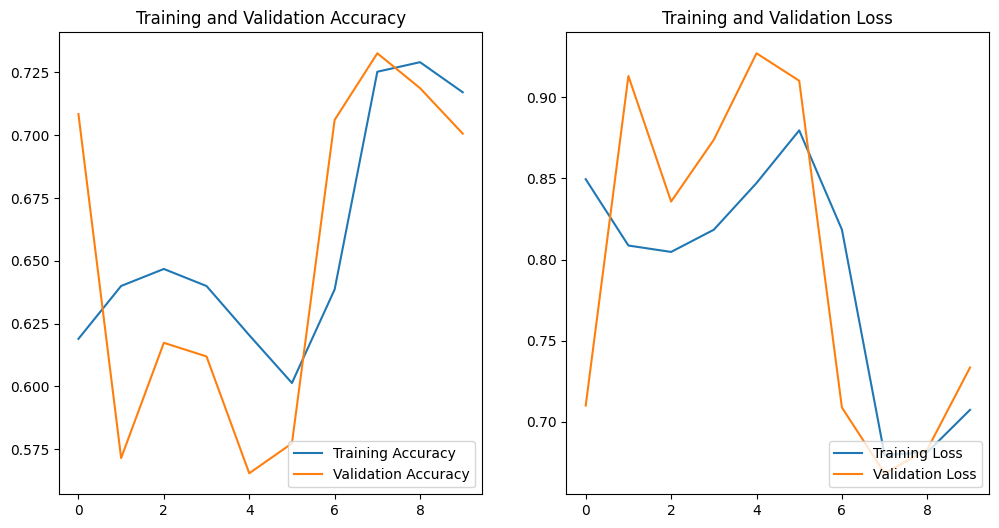

In [13]:
# Evaluate the model2
import matplotlib.pyplot as plt

loss, accuracy = model_1.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history_3["accuracy"]
val_acc = history_3["val_accuracy"]
 
loss = history_3["loss"]
val_loss = history_3["val_loss"]
 
 
EPOCHS = len(acc)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

---

In [66]:
df_motionSense = pd.read_csv(file_path)

In [14]:
WINDOW_LENGTH = 150

X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

In [68]:
NUM_FEATURES = df_motionSense.shape[1] - 1
NUM_CLASSES = df_motionSense['category_encoded'].nunique()

In [69]:
model_1 = Sequential()
model_1.add(SimpleRNN(50, input_shape=(WINDOW_LENGTH, NUM_FEATURES)))
model_1.add(Dense(NUM_CLASSES, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 50)             │         3,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,303 (12.90 KB)

 Trainable params: 3,303 (12.90 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
start_time = time.time()

history_4 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Epoch 1/100
15832/15832 ━━━━━━━━━━━━━━━━━━━━ 161s 10ms/step - accuracy: 0.5894 - loss: 0.8933 - val_accuracy: 0.5401 - val_loss: 0.9589 - learning_rate: 0.0010
Epoch 2/100
15832/15832 ━━━━━━━━━━━━━━━━━━━━ 145s 9ms/step - accuracy: 0.5497 - loss: 0.9436 - val_accuracy: 0.5532 - val_loss: 0.9250 - learning_rate: 0.0010
Epoch 3/100
15832/15832 ━━━━━━━━━━━━━━━━━━━━ 144s 9ms/step - accuracy: 0.5911 - loss: 0.8750 - val_accuracy: 0.6402 - val_loss: 0.8041 - learning_rate: 0.0010
Epoch 4/100
15832/15832 ━━━━━━━━━━━━━━━━━━━━ 294s 19ms/step - accuracy: 0.6513 - loss: 0.7922 - val_accuracy: 0.6522 - val_loss: 0.8182 - learning_rate: 0.0010
Epoch 5/100
15832/15832 ━━━━━━━━━━━━━━━━━━━━ 147s 9ms/step - accuracy: 0.6596 - loss: 0.7915 - val_accuracy: 0.5667 - val_loss: 0.9162 - learning_rate: 0.0010
Epoch 6/100
15832/15832 ━━━━━━━━━━━━━━━━━━━━ 146s 9ms/step - accuracy: 0.5629 - loss: 0.9259 - val_accuracy: 0.5767 - val_loss: 0.9137 - learning_rate: 0.0010
Epoch 7/100
15832/15832 ━━━━━━━━━━━━━━━━━━━━

In [42]:
os.makedirs('models/model_1/h4', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/model_1/h4/history_4.pkl', 'wb') as f:
    pickle.dump(history_4.history, f)

# Guardar o modelo treinado
#model_1.save('models/model_1/model_1.h5')

In [15]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/model_1/h4/history_4.pkl'
model_path = 'models/model_1/model_1.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    history_4 = pickle.load(f)

# Carregar o modelo treinado
model_1 = load_model(model_path)

3958/3958 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9729 - loss: 0.0993
Test loss: 0.09857342392206192, Test accuracy: 0.9727450609207153


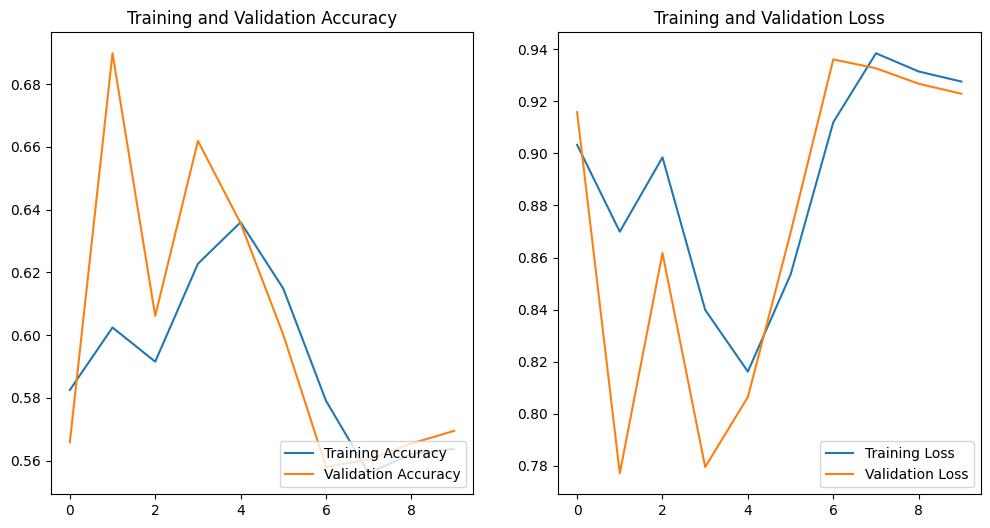

In [16]:
# Evaluate the model2
import matplotlib.pyplot as plt

loss, accuracy = model_1.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history_4["accuracy"]
val_acc = history_4["val_accuracy"]
 
loss = history_4["loss"]
val_loss = history_4["val_loss"]
 
 
EPOCHS = len(acc)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

---

In [45]:
df_motionSense = pd.read_csv(file_path)

In [5]:
WINDOW_LENGTH = 200

X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

In [47]:
NUM_FEATURES = df_motionSense.shape[1] - 1
NUM_CLASSES = df_motionSense['category_encoded'].nunique()

In [48]:
model_1 = Sequential()
model_1.add(SimpleRNN(50, input_shape=(WINDOW_LENGTH, NUM_FEATURES)))
model_1.add(Dense(NUM_CLASSES, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         3,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,303 (12.90 KB)

 Trainable params: 3,303 (12.90 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
start_time = time.time()

history_5 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Epoch 1/100
15831/15831 ━━━━━━━━━━━━━━━━━━━━ 241s 15ms/step - accuracy: 0.5994 - loss: 0.8770 - val_accuracy: 0.5967 - val_loss: 0.8775 - learning_rate: 0.0010
Epoch 2/100
15831/15831 ━━━━━━━━━━━━━━━━━━━━ 187s 12ms/step - accuracy: 0.5787 - loss: 0.9078 - val_accuracy: 0.6250 - val_loss: 0.8432 - learning_rate: 0.0010
Epoch 3/100
15831/15831 ━━━━━━━━━━━━━━━━━━━━ 180s 11ms/step - accuracy: 0.6160 - loss: 0.8596 - val_accuracy: 0.5752 - val_loss: 0.9220 - learning_rate: 0.0010
Epoch 4/100
15831/15831 ━━━━━━━━━━━━━━━━━━━━ 179s 11ms/step - accuracy: 0.5646 - loss: 0.9375 - val_accuracy: 0.5704 - val_loss: 0.9293 - learning_rate: 0.0010
Epoch 5/100
15831/15831 ━━━━━━━━━━━━━━━━━━━━ 182s 11ms/step - accuracy: 0.5605 - loss: 0.9330 - val_accuracy: 0.5728 - val_loss: 0.9012 - learning_rate: 0.0010
Epoch 6/100
15831/15831 ━━━━━━━━━━━━━━━━━━━━ 181s 11ms/step - accuracy: 0.5989 - loss: 0.8811 - val_accuracy: 0.6248 - val_loss: 0.8384 - learning_rate: 0.0010
Epoch 7/100
15831/15831 ━━━━━━━━━━━━━━━━

In [50]:
os.makedirs('models/model_1/h5', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/model_1/h5/history_5.pkl', 'wb') as f:
    pickle.dump(history_5.history, f)

# Guardar o modelo treinado
#model_1.save('models/model_1/model_1.h5')

In [6]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/model_1/h5/history_5.pkl'
model_path = 'models/model_1/model_1.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    history_5 = pickle.load(f)

# Carregar o modelo treinado
model_1 = load_model(model_path)

3958/3958 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9726 - loss: 0.0997
Test loss: 0.09908495843410492, Test accuracy: 0.9727508425712585


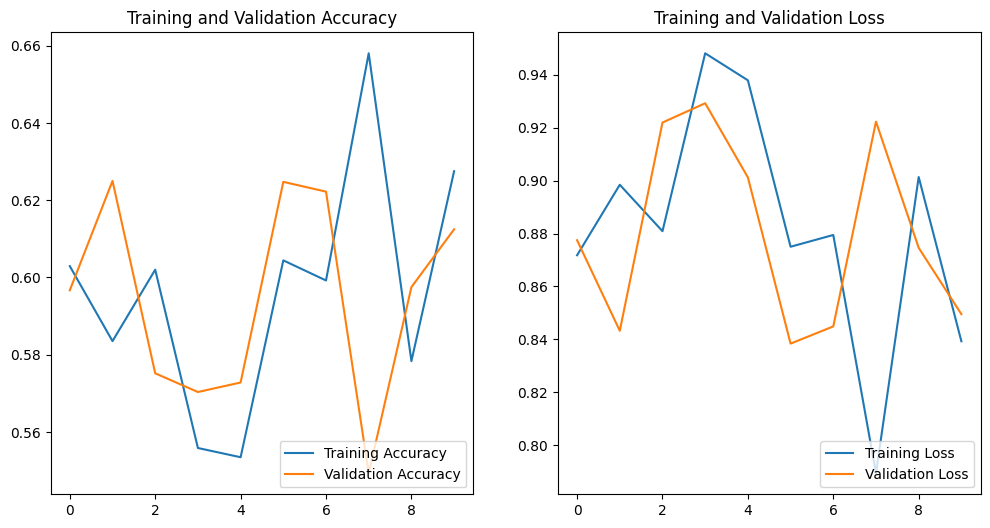

In [8]:
import matplotlib.pyplot as plt

loss, accuracy = model_1.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history_5["accuracy"]
val_acc = history_5["val_accuracy"]
 
loss = history_5["loss"]
val_loss = history_5["val_loss"]
 
 
EPOCHS = len(acc)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

---

---

In [27]:
df_motionSense = pd.read_csv(file_path)

In [35]:
WINDOW_LENGTH = 20

X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

In [36]:
NUM_FEATURES = df_motionSense.shape[1] - 1
NUM_CLASSES = df_motionSense['category_encoded'].nunique()

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Sequential

# Carregue seus dados e prepare-os (X_train, y_train, X_test, y_test)

# Crie o modelo
model_2 = Sequential()

# Adicione uma camada RNN (por exemplo, SimpleRNN) com 64 unidades
model_2.add(SimpleRNN(64, activation='tanh', input_shape=(WINDOW_LENGTH, 12)))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
# Adicione uma camada densa para a saída com ativação softmax (3 classes)
model_2.add(Dense(3, activation='sigmoid'))

# Compile o modelo
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 64)             │         4,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,283 (36.26 KB)

 Trainable params: 9,283 (36.26 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
start_time = time.time()

history_6 = model_2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Epoch 1/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.8449 - loss: 0.4226 - val_accuracy: 0.9280 - val_loss: 0.2363 - learning_rate: 0.0010
Epoch 2/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9292 - loss: 0.2289 - val_accuracy: 0.9375 - val_loss: 0.2069 - learning_rate: 0.0010
Epoch 3/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9368 - loss: 0.2060 - val_accuracy: 0.9409 - val_loss: 0.1966 - learning_rate: 0.0010
Epoch 4/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9404 - loss: 0.1958 - val_accuracy: 0.9428 - val_loss: 0.1892 - learning_rate: 0.0010
Epoch 5/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9408 - loss: 0.1935 - val_accuracy: 0.9408 - val_loss: 0.1946 - learning_rate: 0.0010
Epoch 6/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9403 - loss: 0.1949 - val_accuracy: 0.9480 - val_loss: 0.1744 - learning_rate: 0.0010
Epoch 7/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms

In [72]:
os.makedirs('models/model_2/h6', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/model_2/h6/history_6.pkl', 'wb') as f:
    pickle.dump(history_6, f)

# Guardar o modelo treinado
model_2.save('models/model_2/model_2.h5')

In [10]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/model_2/h6/history_6.pkl'
model_path = 'models/model_2/model_2.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    history_6 = pickle.load(f)

# Carregar o modelo treinado
model_2 = load_model(model_path)

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9245 - loss: 0.2500
Test loss: 0.2493392676115036, Test accuracy: 0.9249301552772522


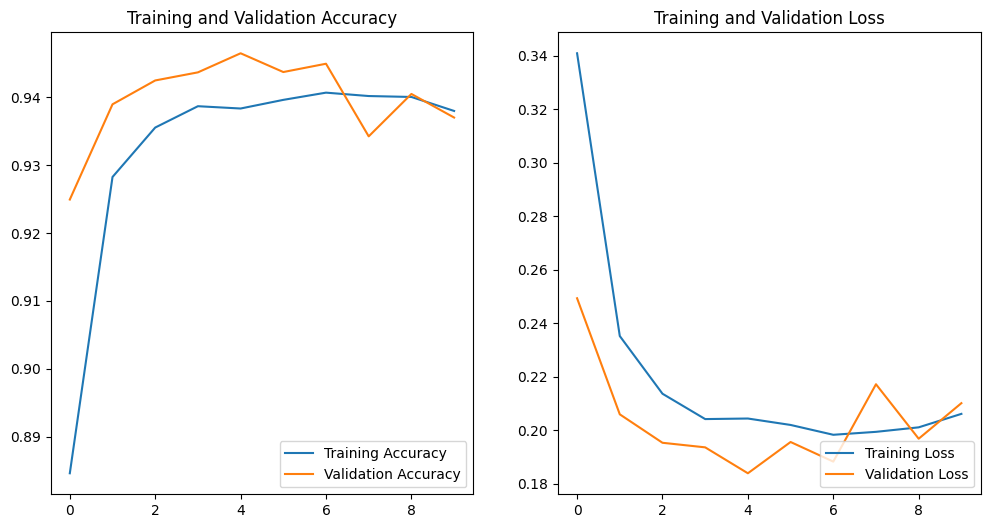

In [11]:
# Evaluate the model2
#import matplotlib.pyplot as plt

loss, accuracy = model_2.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history_6["accuracy"]
val_acc = history_6["val_accuracy"]
 
loss = history_6["loss"]
val_loss = history_6["val_loss"]
 
 
EPOCHS = len(acc)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

---

In [74]:
df_motionSense = pd.read_csv(file_path)

In [12]:
WINDOW_LENGTH = 50

X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

In [13]:
NUM_FEATURES = df_motionSense.shape[1] - 1
NUM_CLASSES = df_motionSense['category_encoded'].nunique()

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential

# Carregue seus dados e prepare-os (X_train, y_train, X_test, y_test)

# Crie o modelo
model_2 = Sequential()

# Adicione uma camada RNN (por exemplo, SimpleRNN) com 64 unidades
model_2.add(SimpleRNN(64, activation='tanh', input_shape=(WINDOW_LENGTH, 12)))

# Adicione uma camada densa para a saída com ativação softmax (3 classes)
model_2.add(Dense(3, activation='softmax'))

# Compile o modelo
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,123 (20.01 KB)

 Trainable params: 5,123 (20.01 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import time
import pickle

start_time = time.time()

history_7 = model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")


Epoch 1/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - accuracy: 0.6540 - loss: 0.7928 - val_accuracy: 0.7902 - val_loss: 0.5656 - learning_rate: 0.0010
Epoch 2/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 56s 4ms/step - accuracy: 0.7111 - loss: 0.6964 - val_accuracy: 0.6547 - val_loss: 0.7928 - learning_rate: 0.0010
Epoch 3/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.6318 - loss: 0.8272 - val_accuracy: 0.5881 - val_loss: 0.8855 - learning_rate: 0.0010
Epoch 4/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.5795 - loss: 0.8925 - val_accuracy: 0.5428 - val_loss: 0.9491 - learning_rate: 0.0010
Epoch 5/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.5491 - loss: 0.9454 - val_accuracy: 0.5894 - val_loss: 0.8985 - learning_rate: 0.0010
Epoch 6/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.5715 - loss: 0.9239 - val_accuracy: 0.5654 - val_loss: 0.9355 - learning_rate: 0.0010
Epoch 7/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 56s 4ms

In [19]:
os.makedirs('models/model_2/h7', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/model_2/h7/history_7.pkl', 'wb') as f:
    pickle.dump(history_7, f)

# Guardar o modelo treinado
#model_1.save('models/model_1/model_1.h5')

In [20]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/model_2/h7/history_7.pkl'
model_path = 'models/model_2/model_2.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    history_7 = pickle.load(f)

# Carregar o modelo treinado
model_1 = load_model(model_path)

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7918 - loss: 0.5631
Test loss: 0.5655590295791626, Test accuracy: 0.7901812791824341


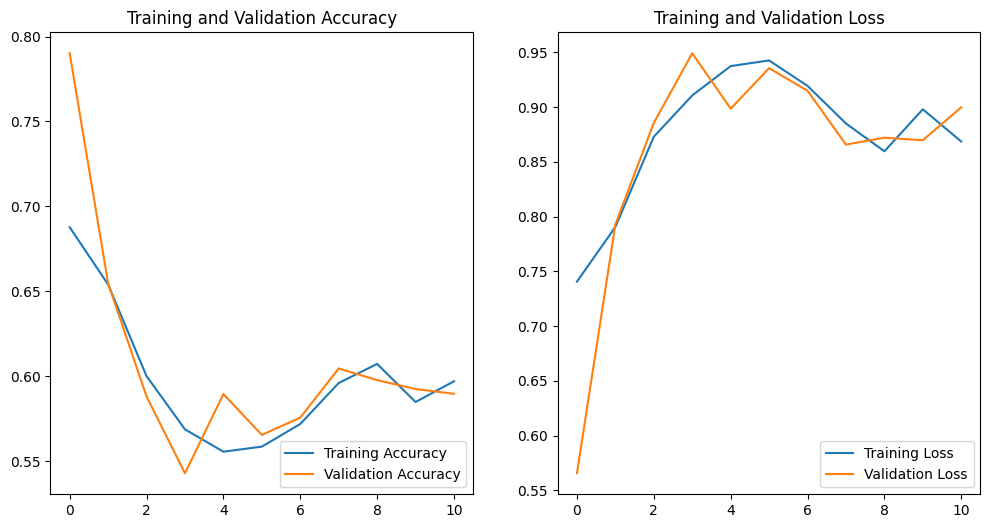

In [22]:
# Evaluate the model2
#import matplotlib.pyplot as plt

loss, accuracy = model_2.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history_7.history["accuracy"]
val_acc = history_7.history["val_accuracy"]
 
loss = history_7.history["loss"]
val_loss = history_7.history["val_loss"]
 
 
EPOCHS = len(acc)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

---

In [23]:
WINDOW_LENGTH = 100

X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

In [24]:
NUM_FEATURES = df_motionSense.shape[1] - 1
NUM_CLASSES = df_motionSense['category_encoded'].nunique()

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential

# Carregue seus dados e prepare-os (X_train, y_train, X_test, y_test)

# Crie o modelo
model_2 = Sequential()

# Adicione uma camada RNN (por exemplo, SimpleRNN) com 64 unidades
model_2.add(SimpleRNN(64, activation='tanh', input_shape=(WINDOW_LENGTH, 12)))

# Adicione uma camada densa para a saída com ativação softmax (3 classes)
model_2.add(Dense(3, activation='softmax'))

# Compile o modelo
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         4,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,123 (20.01 KB)

 Trainable params: 5,123 (20.01 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
start_time = time.time()

history_8 = model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Epoch 1/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 105s 7ms/step - accuracy: 0.5893 - loss: 0.8915 - val_accuracy: 0.6403 - val_loss: 0.7971 - learning_rate: 0.0010
Epoch 2/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 102s 6ms/step - accuracy: 0.5843 - loss: 0.8955 - val_accuracy: 0.6540 - val_loss: 0.7953 - learning_rate: 0.0010
Epoch 3/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 105s 7ms/step - accuracy: 0.6034 - loss: 0.8673 - val_accuracy: 0.6884 - val_loss: 0.7478 - learning_rate: 0.0010
Epoch 4/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 108s 7ms/step - accuracy: 0.6126 - loss: 0.8485 - val_accuracy: 0.6105 - val_loss: 0.8330 - learning_rate: 0.0010
Epoch 5/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 103s 7ms/step - accuracy: 0.6115 - loss: 0.8634 - val_accuracy: 0.6400 - val_loss: 0.8068 - learning_rate: 0.0010
Epoch 6/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 112s 7ms/step - accuracy: 0.6192 - loss: 0.8504 - val_accuracy: 0.6267 - val_loss: 0.8508 - learning_rate: 0.0010
Epoch 7/100
15834/15834 ━━━━━━━━━━━━━━━━━━━━ 9

In [27]:
os.makedirs('models/model_2/h8', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/model_2/h8/history_8.pkl', 'wb') as f:
    pickle.dump(history_8, f)

# Guardar o modelo treinado
#model_1.save('models/model_1/model_1.h5')

In [28]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/model_2/h8/history_8.pkl'
model_path = 'models/model_2/model_2.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    history_8 = pickle.load(f)

# Carregar o modelo treinado
model_1 = load_model(model_path)

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6402 - loss: 0.7958
Test loss: 0.7971060276031494, Test accuracy: 0.6402744054794312


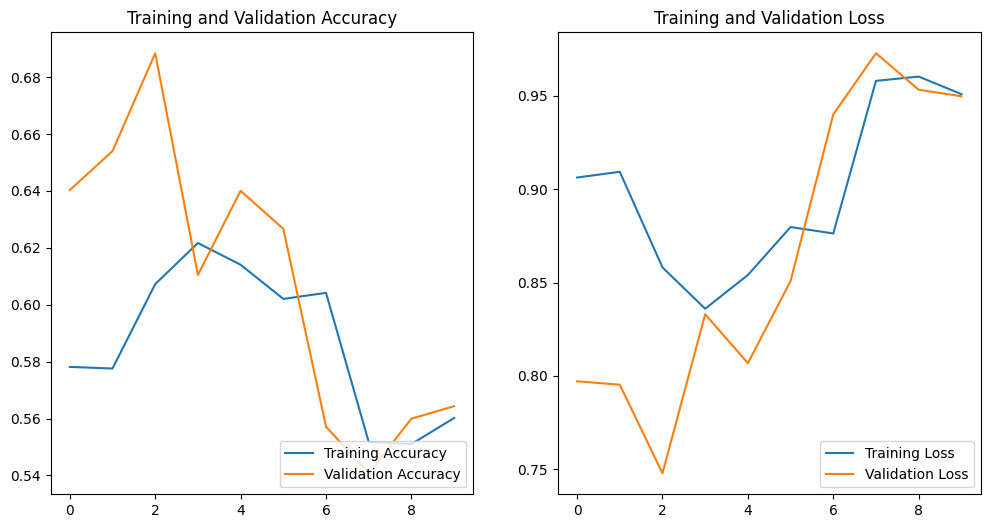

In [29]:
import matplotlib.pyplot as plt

loss, accuracy = model_2.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history_8.history["accuracy"]
val_acc = history_8.history["val_accuracy"]
 
loss = history_8.history["loss"]
val_loss = history_8.history["val_loss"]
 
 
EPOCHS = len(acc)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

---

# multilayer

In [12]:
WINDOW_LENGTH = 20

X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

In [19]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization

# Definir constantes
WINDOW_LENGTH = 20  # Exemplo de comprimento da janela
NUM_FEATURES = 12  # Número de características (features)
NUM_CLASSES = 3  # Número de classes

# Crie o modelo
model = Sequential()

# Adicione uma camada RNN com 64 unidades e Dropout
model.add(SimpleRNN(64, activation='tanh', input_shape=(WINDOW_LENGTH, NUM_FEATURES), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Adicione uma segunda camada RNN com 32 unidades e Dropout
model.add(SimpleRNN(32, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Adicione uma camada densa para a saída com ativação softmax
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 20, 64)         │         4,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,515 (33.26 KB)

 Trainable params: 8,323 (32.51 KB)

 Non-trainable params: 192 (768.00 B)

In [20]:
import time

start_time = time.time()

h = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Epoch 1/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 132s 8ms/step - accuracy: 0.8011 - loss: 0.5210 - val_accuracy: 0.9311 - val_loss: 0.2335 - learning_rate: 0.0010
Epoch 2/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 216s 14ms/step - accuracy: 0.9178 - loss: 0.2773 - val_accuracy: 0.9096 - val_loss: 0.2911 - learning_rate: 0.0010
Epoch 3/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 334s 18ms/step - accuracy: 0.9235 - loss: 0.2620 - val_accuracy: 0.9319 - val_loss: 0.2323 - learning_rate: 0.0010
Epoch 4/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 93s 6ms/step - accuracy: 0.9226 - loss: 0.2610 - val_accuracy: 0.9429 - val_loss: 0.1991 - learning_rate: 0.0010
Epoch 5/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 88s 6ms/step - accuracy: 0.9244 - loss: 0.2555 - val_accuracy: 0.9345 - val_loss: 0.2203 - learning_rate: 0.0010
Epoch 6/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.9220 - loss: 0.2622 - val_accuracy: 0.9382 - val_loss: 0.2114 - learning_rate: 0.0010
Epoch 7/100
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 82

In [25]:
import pickle
os.makedirs('models/test/h1', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/test/h1/h.pkl', 'wb') as f:
    pickle.dump(h.history, f)

# Guardar o modelo treinado
model.save('models/test/model.h5')

In [26]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/test/h1/h.pkl'
model_path = 'models/test/model.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    h = pickle.load(f)

# Carregar o modelo treinado
model = load_model(model_path)

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9674 - loss: 0.1149
Test loss: 0.1149556115269661, Test accuracy: 0.9672802686691284


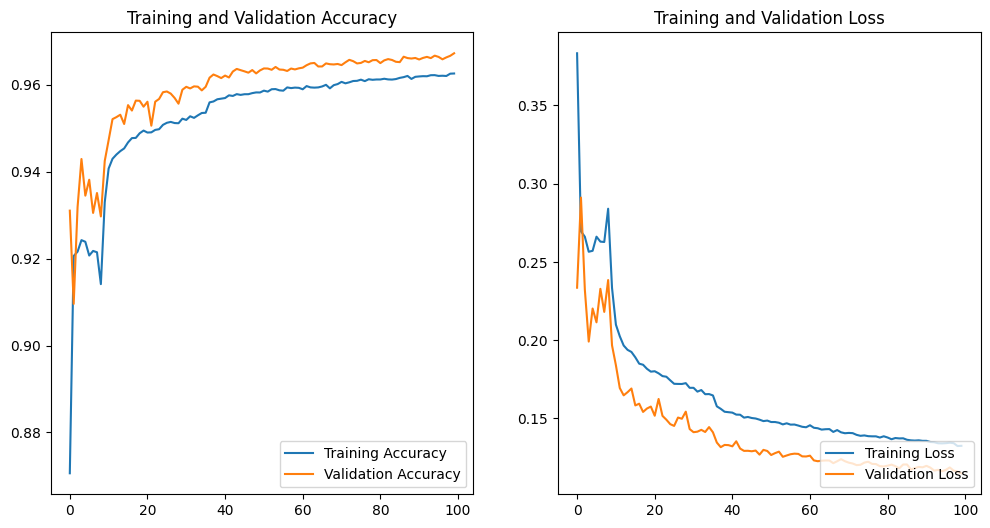

In [22]:
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = h.history["accuracy"]
val_acc = h.history["val_accuracy"]
 
loss = h.history["loss"]
val_loss = h.history["val_loss"]
 
 
EPOCHS = len(acc)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
model = Sequential()
# Adicione a primeira camada SimpleRNN com dropout
model.add(SimpleRNN(units=50, return_sequences=True, activation='tahn'))
model.add(Dropout(0.5))

# Adicione a segunda camada SimpleRNN com dropout
model.add(SimpleRNN(units=50))
model.add(Dropout(0.5))

# Adicione a camada densa para classificação
model.add(Dense(units=3, activation='softmax'))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 20, 50)         │         3,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,353 (32.63 KB)

 Trainable params: 8,353 (32.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 135s 8ms/step - accuracy: 0.7883 - loss: 0.5516 - val_accuracy: 0.9167 - val_loss: 0.2726
Epoch 2/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 119s 8ms/step - accuracy: 0.9075 - loss: 0.3047 - val_accuracy: 0.9130 - val_loss: 0.2915
Epoch 3/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 189s 12ms/step - accuracy: 0.9153 - loss: 0.2839 - val_accuracy: 0.9319 - val_loss: 0.2295
Epoch 4/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 137s 9ms/step - accuracy: 0.9179 - loss: 0.2780 - val_accuracy: 0.9302 - val_loss: 0.2325
Epoch 5/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 119s 7ms/step - accuracy: 0.9186 - loss: 0.2736 - val_accuracy: 0.9354 - val_loss: 0.2255
Epoch 6/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 94s 6ms/step - accuracy: 0.9162 - loss: 0.2803 - val_accuracy: 0.9263 - val_loss: 0.2477
Epoch 7/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - accuracy: 0.9115 - loss: 0.2923 - val_accuracy: 0.8985 - val_loss: 0.3048
Epoch 8/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 94s 6ms/step - accu

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9217 - loss: 0.2613
Test loss: 0.259573370218277, Test accuracy: 0.9223488569259644


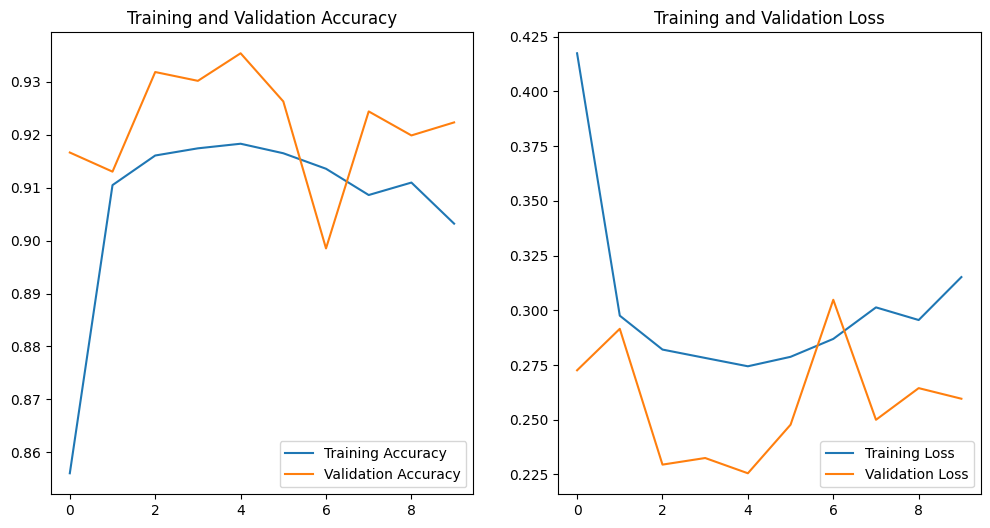

In [ ]:
# Evaluate the model
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
 
#EPOCHS=15
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS_SIZE),acc, label="Training Accuracy")
plt.plot(range(EPOCHS_SIZE),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS_SIZE),loss, label="Training Loss")
plt.plot(range(EPOCHS_SIZE),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 89s 6ms/step - accuracy: 0.9094 - loss: 0.3019 - val_accuracy: 0.9140 - val_loss: 0.2830
Epoch 2/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 136s 9ms/step - accuracy: 0.8992 - loss: 0.3248 - val_accuracy: 0.9043 - val_loss: 0.3024
Epoch 3/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.9015 - loss: 0.3189 - val_accuracy: 0.9096 - val_loss: 0.2945
Epoch 4/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.8992 - loss: 0.3258 - val_accuracy: 0.9154 - val_loss: 0.2775
Epoch 5/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.8993 - loss: 0.3252 - val_accuracy: 0.8989 - val_loss: 0.3170
Epoch 6/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 102s 6ms/step - accuracy: 0.8899 - loss: 0.3484 - val_accuracy: 0.8930 - val_loss: 0.3327
Epoch 7/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.8853 - loss: 0.3625 - val_accuracy: 0.9048 - val_loss: 0.3052
Epoch 8/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 72s 5ms/step - accuracy

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6066 - loss: 0.9097
Test loss: 0.9107359647750854, Test accuracy: 0.605658233165741


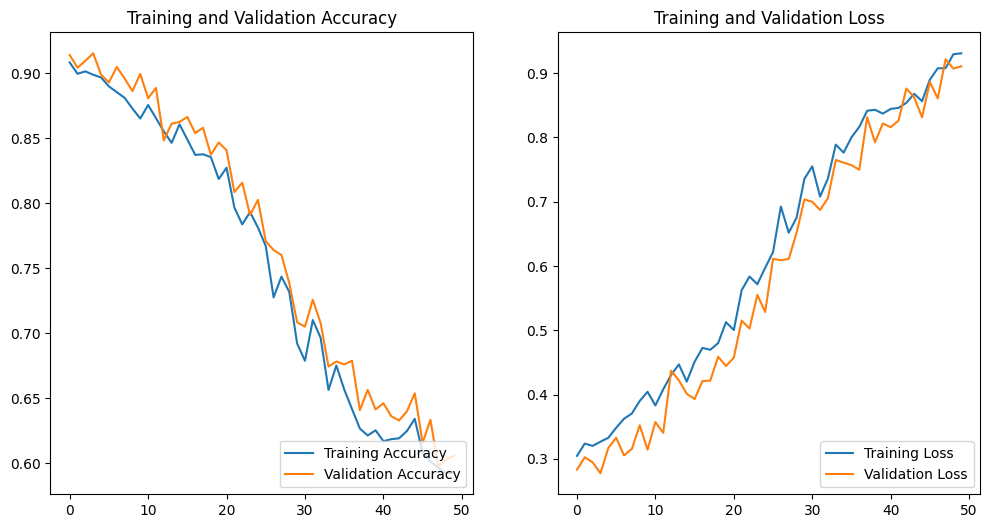

In [ ]:
# Evaluate the model
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
 
EPOCHS_SIZE=50
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS_SIZE),acc, label="Training Accuracy")
plt.plot(range(EPOCHS_SIZE),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS_SIZE),loss, label="Training Loss")
plt.plot(range(EPOCHS_SIZE),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
# Definição da arquitetura da rede neural
model = Sequential()

# Primeira camada RNN com ativação 'tanh'
model.add(SimpleRNN(50, input_shape=(50, X_train.shape[2]), activation='tanh', return_sequences=True))

# Dropout para regularização
model.add(Dropout(0.5))

# Segunda camada RNN com ativação 'tanh'
model.add(SimpleRNN(50, activation='tanh'))

# Dropout para regularização
model.add(Dropout(0.5))

# Camada de saída
model.add(Dense(y_train.shape[1], activation='softmax'))


# Compilação do modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Sumário do modelo
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 50, 50)         │         3,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,355 (32.64 KB)

 Trainable params: 8,355 (32.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 96s 6ms/step - accuracy: 0.7775 - loss: 0.5718 - val_accuracy: 0.9219 - val_loss: 0.2588
Epoch 2/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 94s 6ms/step - accuracy: 0.9073 - loss: 0.3090 - val_accuracy: 0.9312 - val_loss: 0.2405
Epoch 3/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 96s 6ms/step - accuracy: 0.9166 - loss: 0.2824 - val_accuracy: 0.9362 - val_loss: 0.2200
Epoch 4/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 118s 7ms/step - accuracy: 0.9186 - loss: 0.2758 - val_accuracy: 0.9336 - val_loss: 0.2262
Epoch 5/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 132s 8ms/step - accuracy: 0.9183 - loss: 0.2750 - val_accuracy: 0.9288 - val_loss: 0.2351
Epoch 6/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 91s 6ms/step - accuracy: 0.9185 - loss: 0.2751 - val_accuracy: 0.9188 - val_loss: 0.2687
Epoch 7/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 94s 6ms/step - accuracy: 0.9157 - loss: 0.2811 - val_accuracy: 0.9173 - val_loss: 0.2669
Epoch 8/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 100s 6ms/step - accurac